In [104]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sb
from scipy import stats
import quandl
import statsmodels.api as sm
import warnings
from scipy.stats import ttest_ind,ttest_ind_from_stats

# Question One

In [105]:
house_data_read=pd.read_csv('./data/monthlyHousePricesUK.csv', encoding= 'unicode_escape')
house_data=house_data_read.rename(columns={'Unnamed: 0':'Date'}, inplace=False)

In [106]:
# Extract data in range 1991-Jan to 2016-Dec for House_data
house_data_in_range=house_data
house_data_in_range['Date']=pd.to_datetime(house_data_in_range['Date'],format="%b-%y")

In [107]:
house_data_in_range=house_data_in_range[(house_data_in_range['Date'] >= '1991-01-01')]

house_data_in_range=house_data_in_range[(house_data_in_range['Date'] <= '2016-12-31')]
house_data_in_range=house_data_in_range.set_index('Date')

In [108]:
FTSE_data=pd.read_csv('./data/FTSE100.csv')

In [109]:
# Extract data between Jan-1991 to Dec-2016 on FTSE_data
FTSE_data_in_range=FTSE_data
FTSE_data_in_range=FTSE_data_in_range.set_index('Date')

In [110]:
# NOW I HAVE DATA, LET ME DO THE JOB

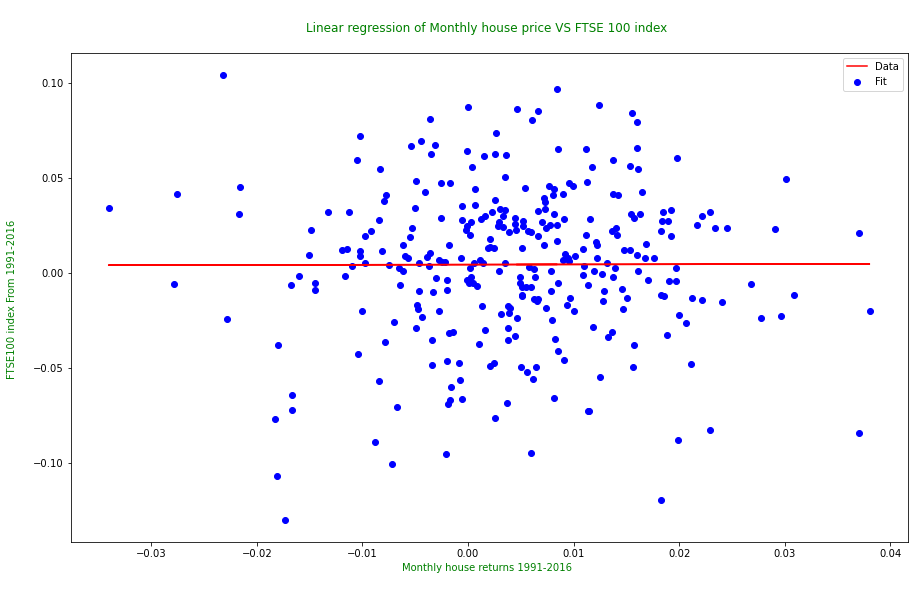

In [111]:
"""
 Using monthly return data from FTSE as dependent variable and house prices monthly
 returns from house prices dataframe, create a regression model.
"""

house_price=house_data_in_range['Average House Price']
house_prices=[int(i[1:].strip().replace(",","")) for i in house_price]

FTSE_prices=list(FTSE_data_in_range['Adj Close'])
FTSE_prices.reverse()
first=FTSE_prices[0]
FTSE_prices=[int(i) for i in FTSE_prices]

# FTSE RETURNS CALCULATION
FTSE_returns=[]
for i in range(1,len(FTSE_prices)):
    val=(FTSE_prices[i]/FTSE_prices[i-1])-1
    FTSE_returns.append(val)
    
#  HOUSES RETURNS CALCULATION
house_returns=[]
for i in range(1,len(house_prices)):
    val=(house_prices[i]/house_prices[i-1])-1
    house_returns.append(val)
    
# PREPARE TO PLOT
FTSE_prices=pd.DataFrame(FTSE_returns)
house_prices=pd.DataFrame(house_returns)
data=pd.concat([FTSE_prices, house_prices], axis=1)
data.columns=['FTSE','HOUSE']

FTSE_mean=data['FTSE'].mean()
HOUSE_mean=data['HOUSE'].mean()

# Plotting a graph
# use regplot from seaborn
plt.figure(figsize=(15,9))

slope, intercept, rvalue, pvalue, stderr= stats.linregress(data['FTSE'],data['HOUSE'])
line_prediction=slope*data['HOUSE'] + intercept
plt.scatter(data['HOUSE'],data['FTSE'], color='b', label="Fit")
plt.plot(data['HOUSE'],line_prediction, color='r', label='Data')
plt.title("\nLinear regression of Monthly house price VS FTSE 100 index \n", color= 'g')
plt.ylabel("FTSE100 index From 1991-2016 \n", color='g')
plt.xlabel("Monthly house returns 1991-2016 \n", color='g')
plt.legend()

cor=data["FTSE"].corr(data["HOUSE"])


In [112]:
"""
 First find coefficients
 What do results tells us?
"""
pvalue=ttest_ind(data['HOUSE'], data['FTSE'])[-1]


print(f"\n \n Correlation coefficient: {cor},  P-value: {pvalue} \n \n") 



 
 Correlation coefficient: 0.026703846404097547,  P-value: 0.9907988705349597 
 



In [113]:
# Since the pvalue > 0.5, the null hypothesis in not rejected but accepted.

# Question Two

In [114]:
# Loading data
college_data=pd.read_csv('./data/College.csv')
college_data=college_data.rename(columns={'Unnamed: 0': 'Schools'}, inplace=False)

In [115]:
required_college_data=college_data[['Apps','Enroll','Outstate','Top10perc','Top25perc','Grad.Rate']]
correlation=required_college_data.corr()
correlation

,Apps,Enroll,Outstate,Top10perc,Top25perc,Grad.Rate
Apps,1.000000,0.846822,0.050159,0.338834,0.351640,0.146755
Enroll,0.846822,1.000000,-0.155477,0.181294,0.226745,-0.022341
Outstate,0.050159,-0.155477,1.000000,0.562331,0.489394,0.571290
Top10perc,0.338834,0.181294,0.562331,1.000000,0.891995,0.494989
Top25perc,0.351640,0.226745,0.489394,0.891995,1.000000,0.477281
Grad.Rate,0.146755,-0.022341,0.571290,0.494989,0.477281,1.000000


In [116]:
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

warnings.filterwarnings("ignore")
graduation_data=required_college_data['Grad.Rate']
data_for_stepwise=required_college_data.drop(columns=['Grad.Rate'],inplace=False)
threshold_in=0.05
columns = forward_regression(data_for_stepwise,graduation_data,threshold_in, False)
print(f"Useful Predictor Variables: {columns} \n")

# Using stepwise needs to be checked on
X =required_college_data.drop(columns=['Grad.Rate'])
Y = required_college_data[['Grad.Rate']]

model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[columns]))).fit()
print(f"\n                              MODE SUMMARY \n\n {model.summary(alpha=0.05)} \n \n")

Useful Predictor Variables: ['Outstate', 'Top25perc'] 


                              MODE SUMMARY 

                             OLS Regression Results                            
Dep. Variable:              Grad.Rate   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     235.0
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.82e-80
Time:                        21:58:11   Log-Likelihood:                -3127.2
No. Observations:                 777   AIC:                             6260.
Df Residuals:                     774   BIC:                             6274.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [117]:
model_data=required_college_data[columns]
regression_model= LinearRegression()

# training mode
regression_model.fit(model_data, graduation_data)
slope=regression_model.coef_
intercept=regression_model.intercept_

#  Extracting CMU data
#print(f"Slope: {slope}, Intercept: {intercept} \n") # Slope and intercept

new_college_data=college_data
new_college_data=new_college_data.set_index("Schools")
new_college_data=new_college_data.transpose()
carnegie_data=pd.DataFrame(new_college_data['Carnegie Mellon University'][1:])
carnegie_data=carnegie_data.transpose()

# predicting using all 5 predictors
five_predictors=['Apps','Enroll','Outstate','Top10perc','Top25perc']
data_for_5_predictors=new_college_data.T[five_predictors]
data_for_5_predictors=data_for_5_predictors[five_predictors]
model=LinearRegression()
model.fit(data_for_5_predictors,new_college_data.transpose()['Grad.Rate'])

data_for_useful_predictors=new_college_data.T[columns]
carnegie_data_for_5_predictors=carnegie_data[five_predictors]
prediction_with_5_predictors=model.predict(carnegie_data_for_5_predictors)

# Predicting using useful predictors
carnegie_predictors=carnegie_data[columns]
carnegie_predictors_outstate=carnegie_predictors[columns[0]]['Carnegie Mellon University']
carnegie_predictors_top25=carnegie_predictors[columns[1]]['Carnegie Mellon University']

carnegie_grad_rate=carnegie_data['Grad.Rate']['Carnegie Mellon University']

print(f"CMU graduation rate: {carnegie_grad_rate} \n")
predicted_carnegie_graduation_rate=regression_model.predict([[carnegie_predictors_outstate,carnegie_predictors_top25]])

print(f"Predicted CMU graduation year Using useful Predictors: {predicted_carnegie_graduation_rate[0]} \n")

print(f"Predicted CMU graduation year Using all 5 Predictors: {prediction_with_5_predictors[0]} \n")


CMU graduation rate: 74 

Predicted CMU graduation year Using useful Predictors: 87.09352365572148 

Predicted CMU graduation year Using all 5 Predictors: 89.20112305346854 



In [118]:
# MAPE function (Custom)
def MAPE(actual_values,predicted_values):
    mape = np.mean(np.abs((actual_values - predicted_values)/actual_values))*100
    return mape
                   
# # get all predictions from 1980 to 2013
predicted_y_for_5_predictors=[]
apps=data_for_5_predictors['Apps']
enroll=data_for_5_predictors['Enroll']
outsate=data_for_5_predictors['Outstate']
top10=data_for_5_predictors['Top10perc']
top25=data_for_5_predictors['Top25perc']
for i in range(len(data_for_5_predictors)):
    predicted_y_for_5_predictors.append(model.predict([[apps[i],enroll[i],outsate[i],top10[i],top25[i]]])[0])

predicted_y_for_useful_predictors=[]
for i in range(len(data_for_5_predictors)):
    predicted_y_for_useful_predictors.append(regression_model.predict([[outsate[i],top25[i]]])[0])

print(f"Mean Absolute Percentage Error for 5 predictor variables: {MAPE(graduation_data,predicted_y_for_5_predictors)}\n")

print(f"Mean Absolute Percentage Error for useful predictor variables: {MAPE(graduation_data,predicted_y_for_useful_predictors)}\n")

print(f"The accuracy for 5 predictor variables: {100 - MAPE(graduation_data,predicted_y_for_5_predictors)}\n")

print(f"The accuracy for useful predictor variables: {100 - MAPE(graduation_data,predicted_y_for_useful_predictors)}\n")


Mean Absolute Percentage Error for 5 predictor variables: 19.05128818178195

Mean Absolute Percentage Error for useful predictor variables: 19.212075643794243

The accuracy for 5 predictor variables: 80.94871181821804

The accuracy for useful predictor variables: 80.78792435620576



# Question 3
- I am going to use data of Vehicles registereed in US and the fuel consumed
- My assumption is that the more vehicles registered each year, the more fuel consumed in US

In [119]:
"""
I am going to use the data of vehicles registered in US and the fuel consumption in USA.
The data starts varies between 1960-2019.


My assumption on the data is that the more vehicles registered, the more fuel consumed.
"""
data=pd.read_excel('./data/vehicle_fuel_data.xlsx', skiprows=1)
data=data.rename(columns={"Unnamed: 0":"Data"})
data= data.transpose()
data_required=data[[0, 2]]
data_required=data_required.transpose()
data_required["Data"]=["vehicles_registered","fuel_consumed"]
vehicles=data_required.transpose()[0][1:]
fuel=data_required.transpose()[2][1:]
time=data_required.columns[1:]

data_needed=pd.DataFrame([vehicles,fuel])

data_needed=data_needed.T
data_needed=data_needed.rename(columns={0:"vehicles", 2:"fuel"})

slope, intercept, rvalue, pvalue, stderr= stats.linregress(data_needed['vehicles'],data_needed['fuel'])
cor=data_needed["fuel"].corr(data_needed["vehicles"])

pvalue=ttest_ind(data_needed['vehicles'],data_needed['fuel'])[-1]
print(f"Correlation Coefficient: {cor} \n\nP-Value: {pvalue}") 


Correlation Coefficient: 0.986485910942452 

P-Value: 3.0527628900928258e-09


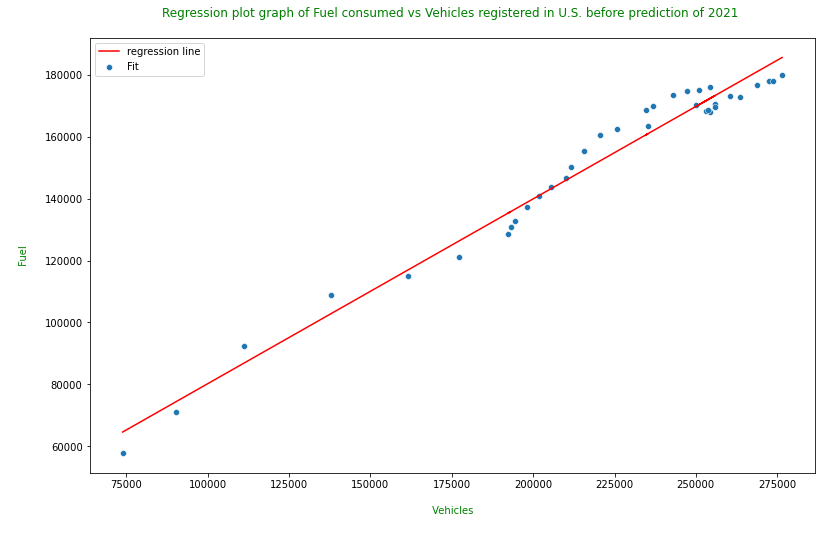

In [120]:
# Regression plot
line_prediction=slope*data_needed['vehicles'] + intercept
plt.figure(figsize=(13,8))
sns.scatterplot(x=data_needed['vehicles'], y= data_needed['fuel'], data=data_needed, label='Fit')
plt.plot(data_needed['vehicles'],line_prediction, color='r', label='regression line')
plt.title("Regression plot graph of Fuel consumed vs Vehicles registered in U.S. before prediction of 2021 \n", color='g')
plt.xlabel("\n Vehicles \n", color='g')
plt.ylabel("\n Fuel \n", color='g')
plt.legend()
plt.show()

Vehicles in 2021: 292235.96503832657, 
Fuel in 2021: 194504.80098094232
Correlation on new data after Prediction : 0.986485910942452


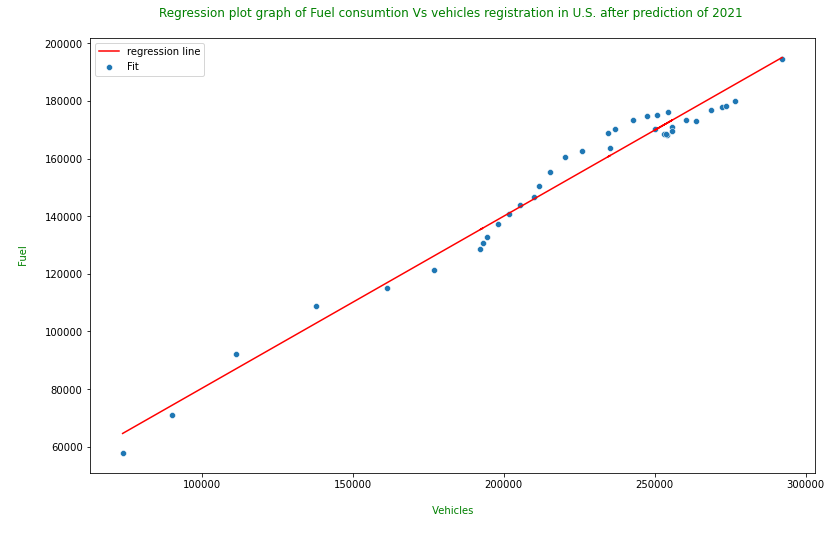

In [121]:
model=LinearRegression()
x=data_needed['vehicles']
y=data_needed['fuel']
time=data_needed.index

data_needed=data_needed.reset_index()
data=data_needed[['index','vehicles']]
# dd=[[data_needed.index,data_needed['vehicles']]

x=x.to_numpy().reshape(-1, 1)
time=time.to_numpy().reshape(-1, 1)

model.fit(time,x)
vehicles_2021=model.predict([[2021]])
# Predict fuel in 2021
y=y.to_numpy().reshape(-1, 1)
vehicles=vehicles_2021[0][0]
model.fit(data,data_needed['fuel'])
fuel_2021=model.predict([[2021,vehicles]])

print(f"Vehicles in 2021: {vehicles}, \nFuel in 2021: {fuel_2021[0]}")

indeces=data_needed['index'].tolist()
cars=data_needed['vehicles'].tolist()
fu=data_needed['fuel'].tolist()
# data_needed.drop(columns=['level_0'], inplace=True)
indeces.append(2021)
cars.append(vehicles)
fu.append(fuel_2021[0])
data=pd.DataFrame([indeces,cars,fu])
data=data.T
data.columns=['index','vehicles','fuel']


# Correlation
slope, intercept, rvalue, pvalue, stderr= stats.linregress(data_needed['vehicles'],data_needed['fuel'])
cor=data_needed["fuel"].corr(data_needed["vehicles"])
print(f"Correlation on new data after Prediction : {cor}") 

# Regression plot
line_prediction=slope*data['vehicles'] + intercept
plt.figure(figsize=(13,8))
sns.scatterplot(x=data['vehicles'], y= data['fuel'], data=data, label='Fit')
plt.plot(data['vehicles'],line_prediction, color='r', label='regression line')
plt.title("Regression plot graph of Fuel consumtion Vs vehicles registration in U.S. after prediction of 2021 \n", color='g')
plt.xlabel("\n Vehicles \n", color='g')
plt.ylabel("\n Fuel \n", color='g')
plt.legend()
plt.show()



# Question 4

In [122]:
# Quandl
quandl.ApiConfig.api_key='irxVPeQNXz_9uYsWhQ_y'
data=quandl.get('ODA/ISR_LUR')
data_needed=data[(data.index >= '1980-12-31') & (data.index <= '2013-12-31')]

# change dates to int
indeces=[]
for d in data_needed.index:
    y=str(d)[:10].split("-")
    y="".join(y)
    indeces.append(int(y))
x=pd.Series(indeces).to_numpy().reshape(-1, 1)
y=data_needed['Value'].to_numpy().reshape(-1, 1)

# Training my model
model=LinearRegression()
model.fit(x, y)

value_in_2020=model.predict([[20201231]])

print(f"Unemployment rate in 2020: {value_in_2020[0][0]}")


Unemployment rate in 2020: 11.36117463712759


In [126]:
# MAPE function (Custom)
def MAPE(actual_values,predicted_values):
    mape = np.mean(np.abs((actual_values - predicted_values)/actual_values))*100
    return mape
                   
# get all predictions from 1980 to 2013
predicted_y=[]
for year in range(1980,2014):
    annee=int("".join(str(data_needed.index[year-1980])[:10].split("-")))
    predicted_y.append(model.predict([[annee]])[0][0])

predicted_y=pd.Series(predicted_y).to_numpy().reshape(-1, 1)
print(f"Mean Absolute Percentage Error: {MAPE(y,predicted_y)}\n")
print(f"Accuracy: {100-MAPE(y,predicted_y)} %\n")



Mean Absolute Percentage Error: 23.710815559556416

Accuracy: 76.28918444044359 %

